## Imports 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.decomposition import PCA
#import category_encoders as ce #Encoding
from yellowbrick.cluster import KElbowVisualizer

In [2]:
collegeDF= pd.read_csv("College.csv")

In [3]:
collegeDF.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#collegeDF.describe()

## Here we use .info to get the information on dataypes in the dataframe. 

#### Unamed vector and private vector to be dropped. We will not do one hot encoding + kmeans due to the fact that we will lose interpritability. 

In [4]:
collegeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

## Verification of No NULL 

In [5]:
collegeDF.isnull().sum()


Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
collegeDF2 = collegeDF.drop(['Unnamed: 0', 'Private'], axis=1)

In [7]:
collegeDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


### all feature vectors are now numeric and ready for standardization. 

In [8]:
collegeDF2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
scaler = preprocessing.StandardScaler().fit(collegeDF2)

In [10]:
scaler.mean_

array([ 3001.63835264,  2018.8043758 ,   779.97297297,    27.55855856,
          55.7966538 ,  3699.90733591,   855.2985843 , 10440.66924067,
        4357.52638353,   549.38095238,  1340.64221364,    72.66023166,
          79.7027027 ,    14.08970399,    22.74388674,  9660.17117117,
          65.46332046])

In [11]:
scaler.scale_

array([3.86771021e+03, 2.44953617e+03, 9.28578072e+02, 1.76290091e+01,
       1.97920291e+01, 4.84729828e+03, 1.52145189e+03, 4.02042684e+03,
       1.09599046e+03, 1.64999081e+02, 6.76635617e+02, 1.63176441e+01,
       1.47128816e+01, 3.95580111e+00, 1.23838248e+01, 5.21840715e+03,
       1.71666525e+01])

In [12]:
features = scaler.transform(collegeDF2)

In [13]:
print(features)

[[-3.46881819e-01 -3.21205453e-01 -6.35089011e-02 ... -8.67574189e-01
  -5.01910084e-01 -3.18251941e-01]
 [-2.10884040e-01 -3.87029908e-02 -2.88584214e-01 ... -5.44572203e-01
   1.66109850e-01 -5.51261842e-01]
 [-4.06865631e-01 -3.76317928e-01 -4.78121319e-01 ...  5.85934748e-01
  -1.77289956e-01 -6.67766793e-01]
 ...
 [-2.33895071e-01 -4.23771558e-02 -9.15087008e-02 ... -2.21570217e-01
  -2.56241250e-01 -9.59029170e-01]
 [ 1.99171118e+00  1.77256262e-01  5.78332661e-01 ...  2.12019418e+00
   5.88797079e+00  1.95359460e+00]
 [-3.26765760e-03 -6.68715889e-02 -9.58163623e-02 ...  4.24433755e-01
  -9.87115613e-01  1.95359460e+00]]


### PCA needed for us to visualize the data clusters

In [14]:
pca = PCA()
pca.fit(features)


PCA()

In [15]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

Text(0, 0.5, 'Cumulative Explained Variance')

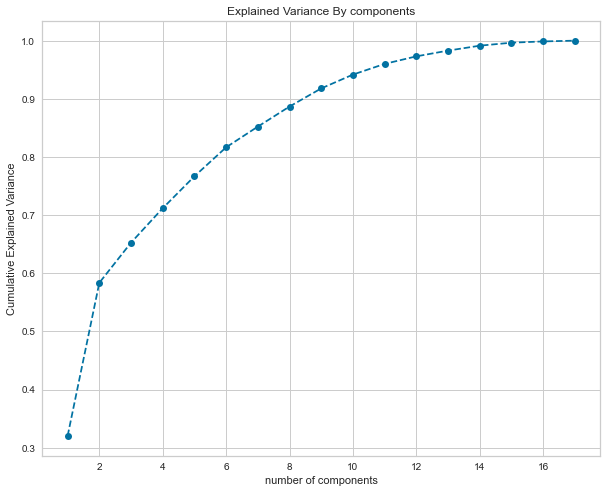

In [16]:
## Lets plot the variance plot 
plt.figure(figsize = (10,8))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance By components")
plt.xlabel("number of components")
plt.ylabel("Cumulative Explained Variance")

### A rule of thumb is to preserve 80% of the variance. Thus we choose to keep 6 components using this graph. 

In [17]:
pca = PCA(n_components = 6)
pca.fit(features)

PCA(n_components=6)

In [18]:
pca.transform(features)

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01,
        -9.21749399e-01, -7.43975397e-01, -2.98306081e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879811e+00,
         3.58891823e+00,  1.05999660e+00, -1.77137309e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01,
         6.77240527e-01, -3.69613274e-01, -9.60591689e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05642846e-04,
         5.43162817e-02, -5.16021119e-01,  4.68014248e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356369e+00,
         8.52053994e-01, -9.47754742e-01, -2.06993738e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00,
        -1.08022557e-01, -1.13217594e+00,  8.39893087e-01]])

In [19]:
scores_pca= pca.transform(features)

### Finding optimal k using elbow method 

In [20]:
np.random.seed=(5)

#### Elbow found at k=3

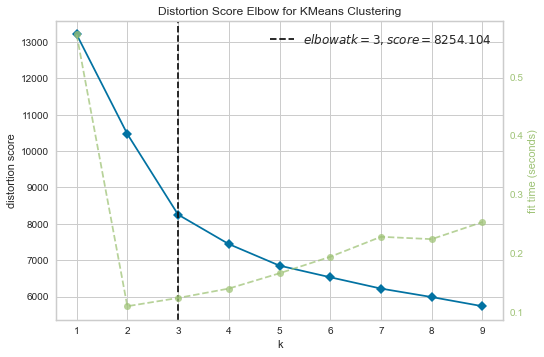

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()

### Fit k-means

In [28]:
kmeans= KMeans(n_clusters=3, init = "k-means++", random_state=5)

In [42]:
kmeans.fit(scores_pca)

KMeans(n_clusters=3, random_state=5)

In [33]:
kmeans.cluster_centers_

array([[-1.58990654e+00, -1.17811524e-01,  2.09962262e-02,
         8.75710705e-02, -2.50010686e-02, -1.31173753e-02],
       [ 2.16724493e+00, -1.45663101e+00, -3.65941861e-02,
        -2.14205891e-01,  2.87133987e-02,  8.23228281e-02],
       [ 1.79159477e+00,  4.45707052e+00, -2.33884263e-03,
         1.54901623e-01,  4.25214461e-02, -1.57531391e-01]])

In [47]:
kmeans.labels_
y_kmeans = kmeans.predict(scores_pca)

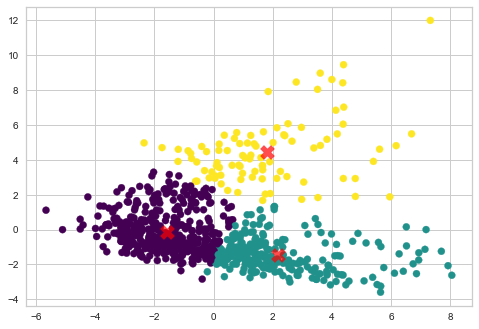

In [58]:
# Visualization of the clustered data. cluster centers marked with a "X".
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="X", c='red', s=200, alpha=0.7)

## Some visualization graduation rate by room/board on private feature

In [41]:
#sns.set_style('whitegrid')
#sns.lmplot('Room.Board','Grad.Rate',data=collegeDF, hue='Private',
           #palette='coolwarm',size=6,aspect=1,fit_reg=False)

#sns.set_style('darkgrid')
#g = sns.FacetGrid(collegeDF,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

#sns.set_style('darkgrid')
#g = sns.FacetGrid(collegeDF,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

#collegeDF['Grad.Rate']['Cazenovia College'] = 100

#collegeDF[collegeDF['Grad.Rate'] > 100]

#sns.set_style('darkgrid')
#g = sns.FacetGrid(collegeDF,hue="Private",palette='coolwarm',size=6,aspect=2)
#g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)